# 3. 다중 회귀 분석 (Multiple Regression)
* 규제(Regularization) : 머신러닝 모델리 훈련 세트를 과도하게 학습하지 못하도록 막는 것
* 선형회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일

## 2-1. 농어 길이와 높이에 따른 무게 예측

### 1) 문제 정의
농어 길이(Length), 높이(Height), 두께(Width)에 따른 무게(Weight) 예측하기

### 2) 데이터 수집
* https://www.kaggle.com/aungpyaeap/fish-market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ori_data = pd.read_csv('data/02_fish/fish.csv')
ori_data

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
data = ori_data[ori_data.Species=='Perch'][['Length2', 'Height', 'Width', 'Weight']]
data.columns = ['Length', 'Height', 'Width', 'Weight']
data

,Length,Height,Width,Weight
72,8.4,2.1120,1.4080,5.9
73,13.7,3.5280,1.9992,32.0
74,15.0,3.8240,2.4320,40.0
75,16.2,4.5924,2.6316,51.5
76,17.4,4.5880,2.9415,70.0
77,18.0,5.2224,3.3216,100.0
78,18.7,5.1992,3.1234,78.0
79,19.0,5.6358,3.0502,80.0
80,19.6,5.1376,3.0368,85.0
81,20.0,5.0820,2.7720,85.0


### 3) 데이터 전처리
* 결측치 처리

In [3]:
data.shape

(56, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Length  56 non-null     float64
 1   Height  56 non-null     float64
 2   Width   56 non-null     float64
 3   Weight  56 non-null     float64
dtypes: float64(4)
memory usage: 2.2 KB


In [5]:
data.isnull().sum()

Length    0
Height    0
Width     0
Weight    0
dtype: int64

### 4) 데이터 탐색
* 상관관계
* 산점도(Scatter Plot) -> 생략

In [6]:
data.corr()

,Length,Height,Width,Weight
Length,1.000000,0.985584,0.974617,0.958656
Height,0.985584,1.000000,0.982943,0.968441
Width,0.974617,0.982943,1.000000,0.963943
Weight,0.958656,0.968441,0.963943,1.000000


### 5) 모델 학습
* 데이터 쪼개기
* 변환기 적용하기
* 다중회귀 학습
* 다중회귀 예측

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # 변환기

In [8]:
# 독립변수 : Length, Height, Width
# 종속변수 : Weight
input_data = data[['Length', 'Height', 'Width']].to_numpy()
target_data = data['Weight'].to_numpy()
input_data.shape, target_data.shape

((56, 3), (56,))

In [38]:
# 훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 3), (14, 3), (42,), (14,))

### 변환기 (Transformer)

In [39]:
poly = PolynomialFeatures(degree=5)   # 기본값 (제곱항을 만듦)
train_poly = poly.fit_transform(train_input)
train_poly.shape

(42, 56)

In [40]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [41]:
test_poly = poly.fit_transform(test_input)
test_poly.shape

(14, 56)

In [42]:
# 정규화
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀 (Ridge)
* 선형 회귀 모델에 규제를 추가한 모델
* 릿지는 계수를 제곱한 값을 기준으로 규제를 적용 (L2 -> 선형 모델에 L2규제가 적용되면 릿지회귀라고 함)
* 일반적으로 릿지를 조금 더 선호
* alpha값은 우리가 지정해야 하는 하이퍼 파라미터임

In [51]:
lr = Ridge(alpha=0.1)

In [52]:
lr.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [53]:
lr.coef_, lr.intercept_

(array([ 0.00000000e+00,  2.76892628e+01, -1.83584948e+00, -1.95533898e+01,
         3.01443623e+01,  1.71123377e+01,  1.77338905e+01,  4.58691290e+00,
         3.78634741e+00,  2.29633132e+01,  1.95546393e+01,  1.79106518e+01,
         1.42889189e+01,  1.35488405e+01,  7.40803906e+00,  1.90664802e+01,
         5.31335570e+00, -2.20221783e+00,  1.04655501e+01,  4.18531586e+01,
         5.91176135e+00,  1.50914960e+01, -7.36368453e-01,  2.00950871e+01,
         1.09208858e+00, -1.30290300e+00,  1.99185516e+01, -1.31058193e+00,
        -3.82067084e+00,  1.18902263e+01,  1.38180301e+01, -8.62947643e+00,
        -1.02607468e+01,  8.32664340e+00,  4.58293381e+01, -6.18066720e+00,
         1.36045427e+01, -1.78391661e+01,  2.85760395e+01, -6.63342097e+00,
        -2.60989590e+01,  3.77201142e+01, -4.34689550e-01, -2.09765252e+01,
        -2.38355405e+01,  4.02104486e+01,  1.28473247e-03, -2.06941773e+01,
        -2.18012378e+01, -3.82797476e+00,  3.54389670e+01, -5.86274121e+00,
        -2.5

In [54]:
### 6) 모델 평가
pred = lr.predict(test_scaled)
pd.DataFrame({'Length': test_input[:,0], 
              'Height': test_input[:,1], 
              'Width': test_input[:,2], 
              'Actual Weight': test_target, 'Predicted Weight': pred})

,Length,Height,Width,Actual Weight,Predicted Weight
0,8.4,2.1120,1.4080,5.9,-14.919346
1,18.0,5.2224,3.3216,100.0,80.527464
2,27.5,7.2828,4.5662,250.0,256.557194
3,21.3,6.3840,3.5340,130.0,132.125478
4,22.5,5.8560,3.6240,130.0,138.854939
5,40.0,11.1350,6.6300,820.0,783.154570
6,30.0,7.6156,4.7716,320.0,309.079921
7,24.6,6.7334,4.1658,188.0,193.000676
8,39.0,11.1366,7.4934,900.0,830.413611
9,21.0,5.6925,3.6675,125.0,122.060535


In [55]:
lr.score(train_scaled, train_target)

0.9904048455941404

In [56]:
lr.score(test_scaled, test_target)

0.9826465162736444

### 적절한 alpha값 찾기
* alpha값을 바꾸면서 score()의 결과 그래프 그려보기

In [57]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

train_score

[0.9930679875694713,
 0.9918120087949331,
 0.9904048455941404,
 0.9896217956447124,
 0.9887366307205133,
 0.9841994538470815]

C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


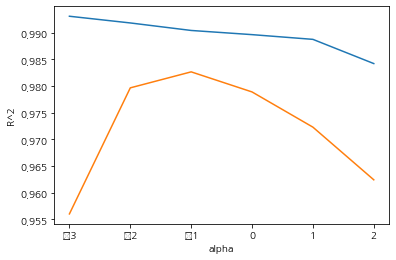

In [58]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [77]:
ridge.coef_

array([0.        , 8.0546876 , 7.88319673, 7.40751325, 7.47046281,
       7.4383015 , 7.13926509, 7.35348799, 7.06010647, 6.73851945,
       6.83989115, 6.87160962, 6.61853818, 6.86790948, 6.61439077,
       6.3572279 , 6.82965508, 6.57437494, 6.31581223, 6.05795199,
       6.21718372, 6.29528715, 6.04987936, 6.34583703, 6.10012478,
       5.86152613, 6.36691874, 6.12043063, 5.88047386, 5.65040708,
       6.35712865, 6.10931664, 5.86741838, 5.6346908 , 5.41300396,
       5.62609104, 5.74046312, 5.48683187, 5.83232456, 5.57891504,
       5.3387837 , 5.89886408, 5.64582356, 5.40532178, 5.18083767,
       5.93770047, 5.68496759, 5.44396643, 5.2181047 , 5.00934418,
       5.94703485, 5.69436801, 5.45261898, 5.22507991, 5.01364171,
       4.8188815 ])

### 라쏘 회귀
* 라쏘는 계수의 절대값을 기준으로 규제를 적용
* 라쏘는 계수의 값을 아예 0으로 만들 수 있음
* 유용한 특성을 골라내는 용도로 사용 가능

In [70]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [71]:
lasso.score(train_scaled, train_target)

0.988820885788649

In [72]:
lasso.score(test_scaled, test_target)

0.9823020708550176

In [73]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # Warning
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

train_score

C:\Users\myha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18721.489838499336, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\myha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13004.417193452398, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


[0.9925196861132805,
 0.9923253689781224,
 0.990234541466571,
 0.9898226808884522,
 0.988771836162061,
 0.9078694930826314]

C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


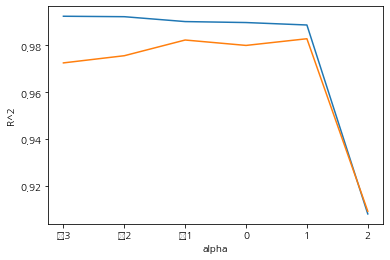

In [74]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [76]:
lasso.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.38638378,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  80.2490307 , 167.83298375,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [78]:
np.sum(lasso.coef_ == 0)

53